In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

In [2]:
# File paths for the reviews
pos_file = "C:\\Users\\Krishna Sharma\\Downloads\\2model\\2model\\neural\\rt-polaritydata\\rt-polaritydata\\rt-polarity.pos"

neg_file = "C:\\Users\\Krishna Sharma\\Downloads\\2model\\2model\\neural\\rt-polaritydata\\rt-polaritydata\\rt-polarity.neg"

# Load the reviews into lists
with open(neg_file, 'r', encoding='latin-1') as neg_f:
    neg_reviews = neg_f.readlines()

with open(pos_file, 'r', encoding='latin-1') as pos_f:
    pos_reviews = pos_f.readlines()

c:\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.5936 - loss: 0.6589 - val_accuracy: 0.7660 - val_loss: 0.4977
Epoch 2/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8508 - loss: 0.3546 - val_accuracy: 0.7570 - val_loss: 0.4893
Epoch 3/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9252 - loss: 0.2166 - val_accuracy: 0.7560 - val_loss: 0.5730
Epoch 4/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9640 - loss: 0.1164 - val_accuracy: 0.7550 - val_loss: 0.7011
Epoch 5/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9885 - loss: 0.0503 - val_accuracy: 0.7530 - val_loss: 0.8556
Epoch 6/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9951 - loss: 0.0245 - val_accuracy: 0.7540 - val_loss: 1.0308
Epoch 7/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9983 - loss: 0.0099 - val_accuracy: 0.7510 - val_loss: 1.1778
Epoch 8/10
250/250 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.9996 - loss: 0.0051 - val_accuracy: 0.

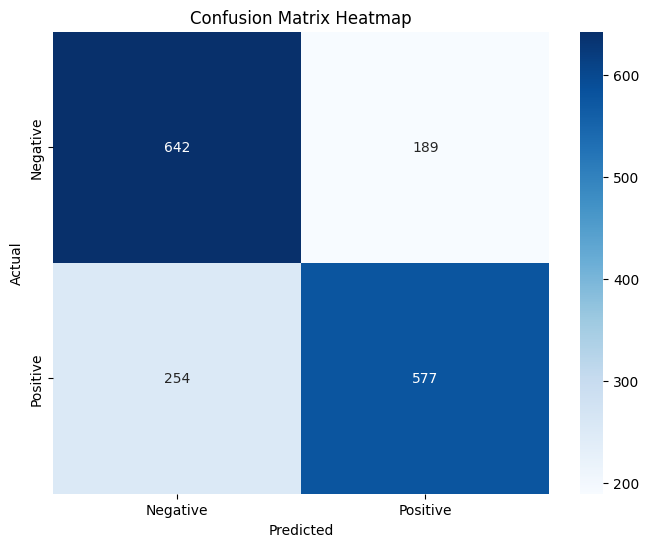

<Figure size 640x480 with 0 Axes>

In [3]:

# Create DataFrames for both positive and negative reviews
neg_df = pd.DataFrame(neg_reviews, columns=['Review'])
neg_df['class'] = 0  # Label negative reviews as class 0
pos_df = pd.DataFrame(pos_reviews, columns=['Review'])
pos_df['class'] = 1  # Label positive reviews as class 1

# Combine and split the data into train, validation, and test sets
train_data = pd.concat([neg_df.iloc[:4000], pos_df.iloc[:4000]])
val_data = pd.concat([neg_df.iloc[4000:4500], pos_df.iloc[4000:4500]])
test_data = pd.concat([neg_df.iloc[4500:], pos_df.iloc[4500:]])

X_train, y_train = train_data['Review'], train_data['class']
X_val, y_val = val_data['Review'], val_data['class']
X_test, y_test = test_data['Review'], test_data['class']

# Apply TF-IDF Vectorization to transform text data
tfidf = TfidfVectorizer(max_features=5000)
X_train = tfidf.fit_transform(X_train).toarray()
X_val = tfidf.transform(X_val).toarray()
X_test = tfidf.transform(X_test).toarray()

# Build a simple neural network model
model = Sequential([
    Dense(128, input_dim=X_train.shape[1], activation='relu'),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model with appropriate loss and optimizer
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model on the training data with validation data
model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_val, y_val))

# Make predictions on the test data
y_pred_probs = model.predict(X_test)
y_pred = (y_pred_probs > 0.5).astype(int).flatten()

# Calculate confusion matrix and classification metrics
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='binary')

# Print performance metrics
print("\nFinal Performance Metrics:")
print(f"True Positives (TP): {tp}")
print(f"True Negatives (TN): {tn}")
print(f"False Positives (FP): {fp}")
print(f"False Negatives (FN): {fn}")
print(f"Precision: {precision * 100:.3f}%")
print(f"Recall: {recall * 100:.3f}%")
print(f"F1-score: {f1 * 100:.3f}%")

# Plot the confusion matrix as a heatmap
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.title('Confusion Matrix Heatmap')
plt.show()

# Save the confusion matrix heatmap as a high-resolution image
plt.savefig('confusion_matrix_heatmap.png', bbox_inches='tight', dpi=300)
